In [1]:
import os 

import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from helpers import load_experiment

In [2]:
# baseline /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/18-14-45
# framework (simple) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/19-47-58
# framework /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/20-17-31
# framework (parallel) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-11/21-18-11
# baseline (sigmoid) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/06-58-58
# framework with pre-trianing: /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-12/12-19-17
# ultimate framework (no weights backbone, pre-train textual) /home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-13/09-57-08

dm, model = load_experiment("/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-22/11-03-11")

Global seed set to 42


Fetching configuration...
Loading datamodule...


[nltk_data] Downloading package wordnet to /home/danis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/torchtext/data/utils.py:105: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(
100%|██████████| 2700/2700 [00:00<00:00, 9919.80it/s]


Len of vocab:  53
Max len of caption:  12
Index for <pad>: [0]
Loading model


/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_task' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['criterion_task'])`.
  rank_zero_warn(
/home/danis/anaconda3/envs/bottleneck/lib/python3.10/site-packages/pytorch_lightning/utilities/parsing.py:262: UserWarning: Attribute 'criterion_tie' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ig

In [3]:
train_loader = dm.train_dataloader()
train_set = train_loader.dataset

-1.6883053 77.645546 6.513111e-05


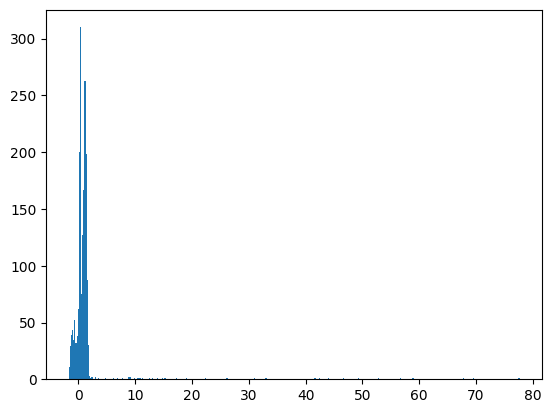

-4.887034 248.87529 0.00040044915


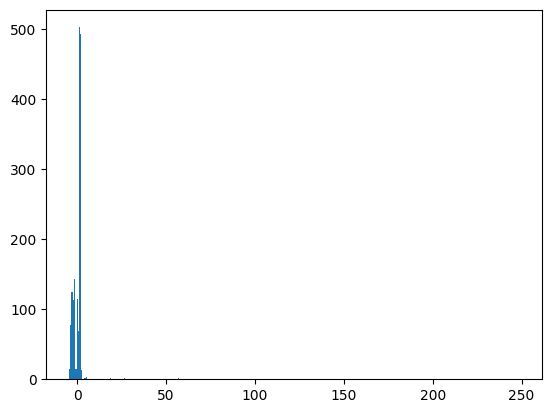

-3.195114 77.079796 0.0026526875


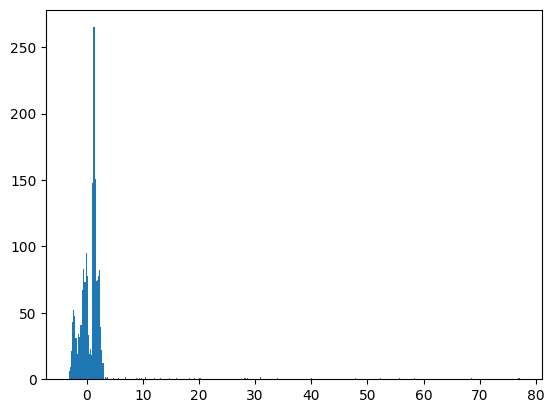

-326.25342 1.7792245 0.0027622888


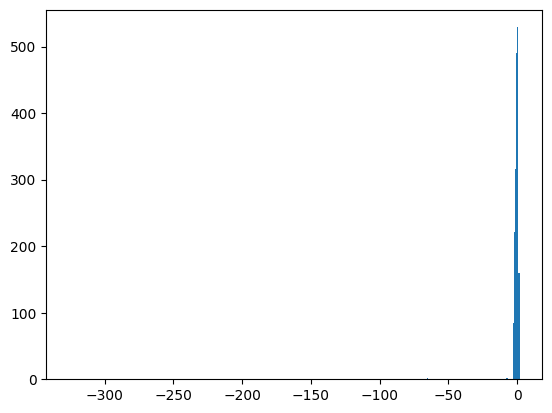

-3.3099024 241.19656 0.014234353


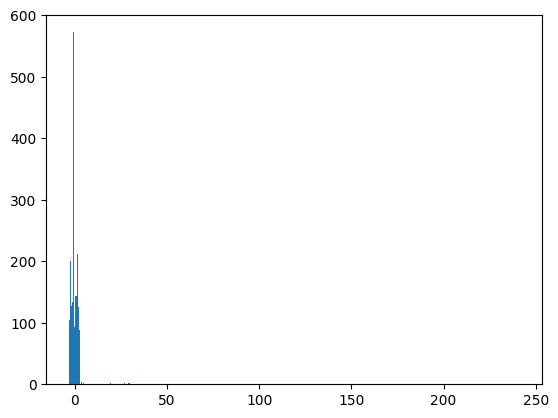

-97.686516 1.5793439 0.000101557


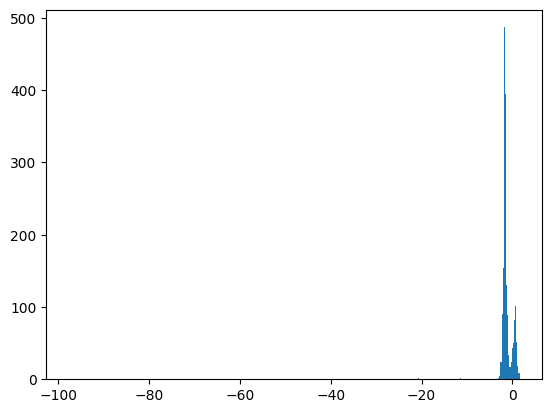

-2.5315485 124.41362 0.0013719592


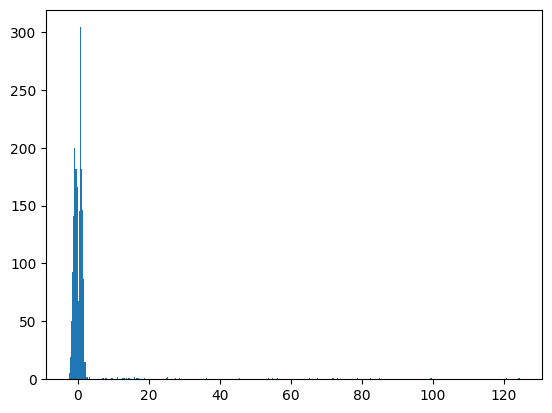

-1.4293884 19.249651 3.822148e-06


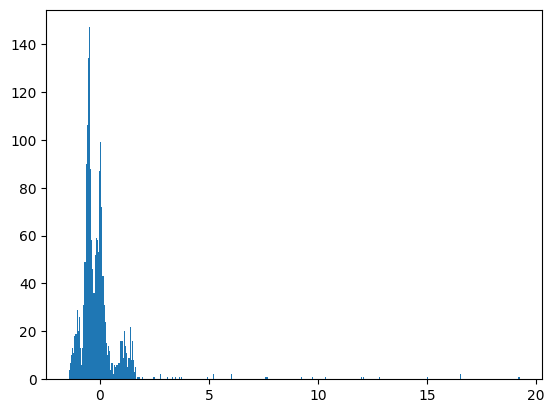

-272.37827 2.860779 0.0019288361


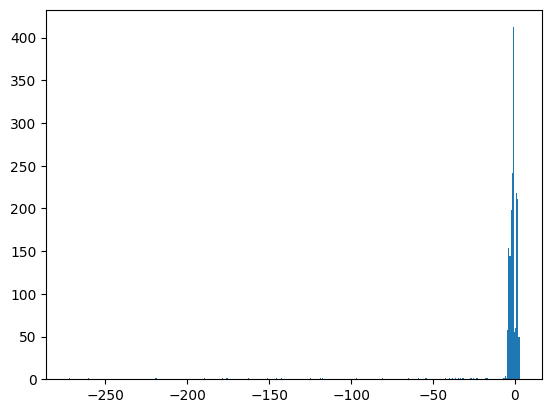

-194.73141 2.8772285 0.00022801757


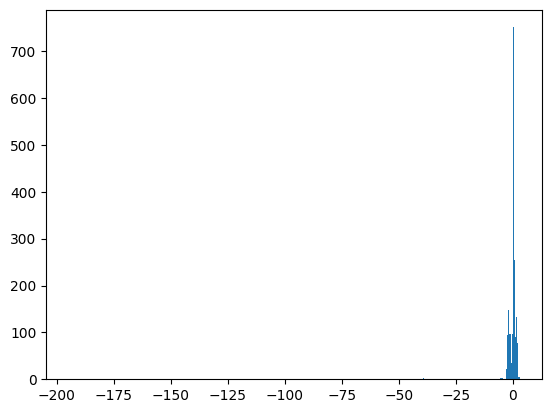

In [4]:
scores = list()
n_bins = 400

for feature_id in range(10):

    logits = list()

    for batch in train_loader:
        for i in range(batch["indices"].shape[0]):
            image = batch["image"][i].unsqueeze(0).cuda()
            logit = model.main.feature_extractor(image).cpu().detach().numpy()[0][feature_id]
            logits.append(logit)
    
    logits = np.array(logits)
    print(logits.min(), logits.max(), np.abs(logits).min())
    plt.hist(logits, bins=n_bins)
    plt.show()

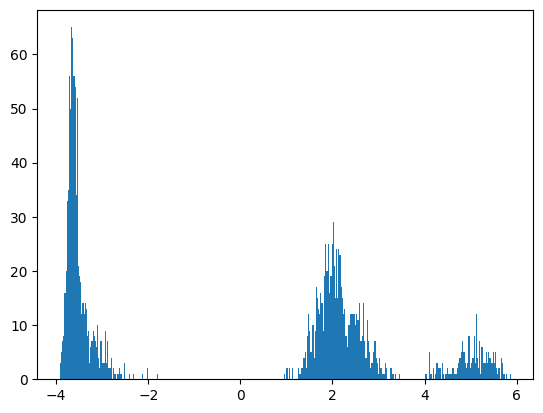

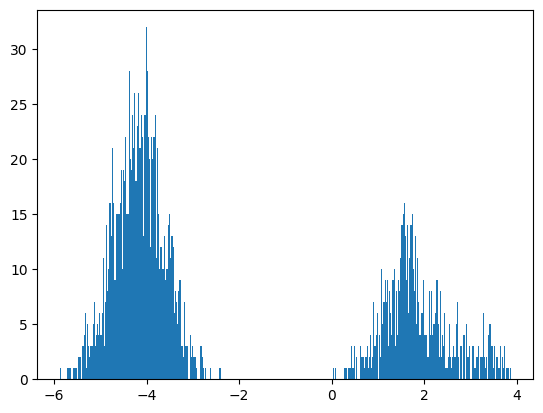

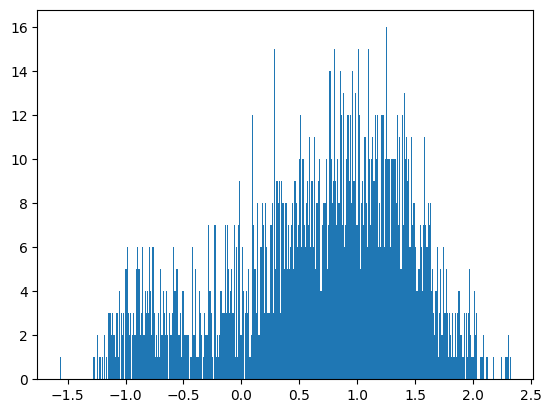

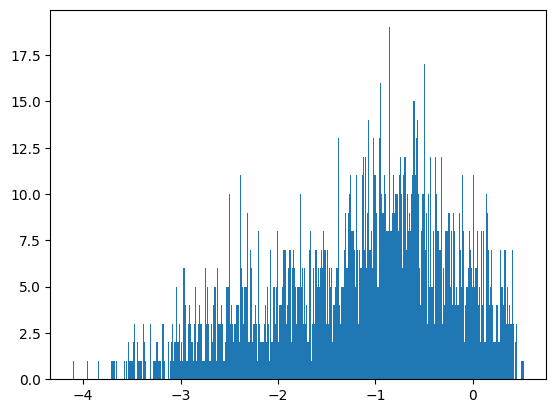

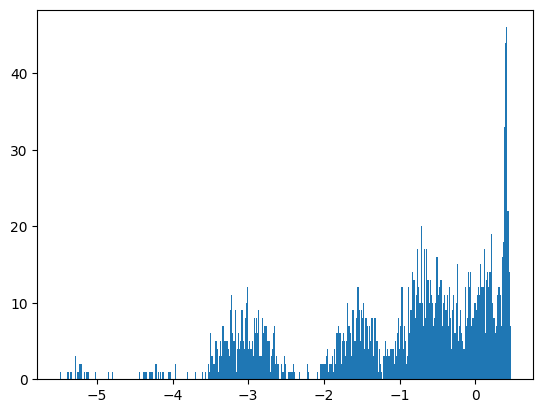

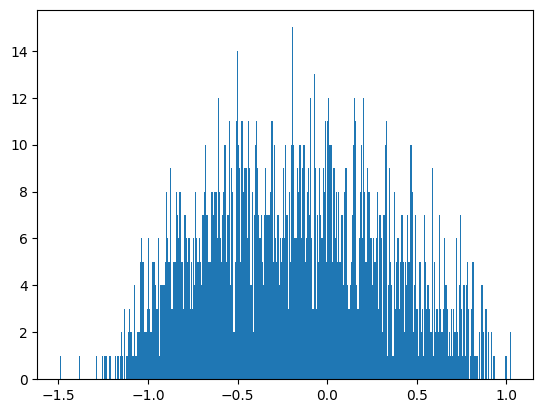

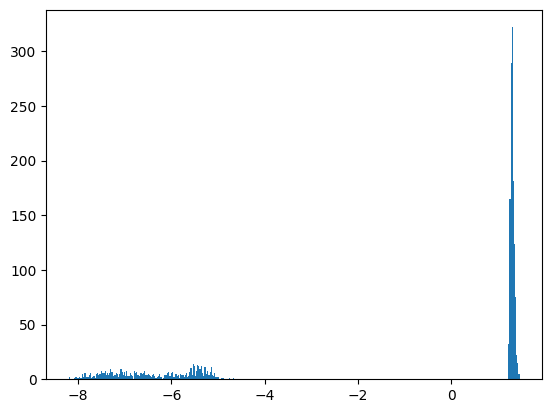

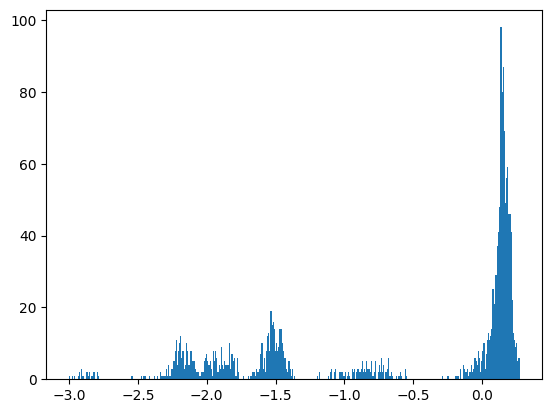

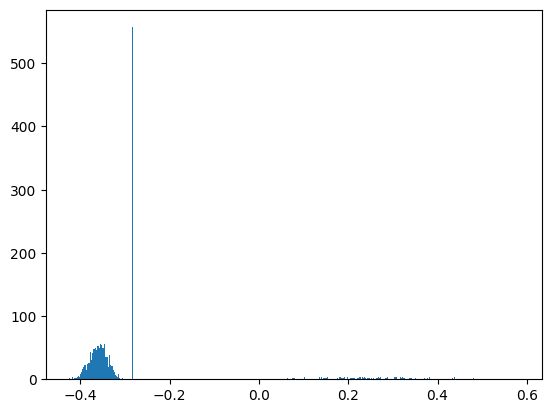

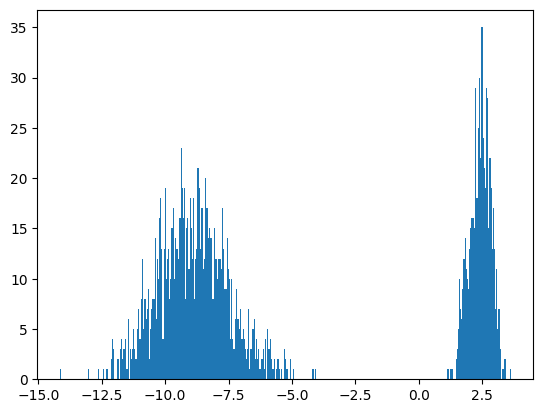

In [5]:
scores = list()
n_bins = 400

for feature_id in range(10):

    logits = list()

    for batch in train_loader:
        for i in range(batch["indices"].shape[0]):
            indices = batch["indices"][i].unsqueeze(0).cuda()
            logit = model.main.inference_textual(indices)[0].cpu().detach().numpy()[feature_id]
            logits.append(logit)
    
    logits = np.array(logits)
    plt.hist(logits, bins=n_bins)
    plt.show()

In [6]:
from extract import trace_interpretations

In [7]:
trace_interpretations(dm, model)

Vocab size: 54
Processing train data via concept extractor...


100%|██████████| 29/29 [00:17<00:00,  1.68it/s]
/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/extract.py:57: RuntimeWarning: invalid value encountered in true_divide
  distributions = np.nan_to_num(np.array(distributions) / n_tokens)


Export results...


100%|██████████| 10/10 [00:00<00:00, 7465.83it/s]


Processing train data via feature extractor...


100%|██████████| 29/29 [00:15<00:00,  1.86it/s]


Export results...


100%|██████████| 10/10 [00:00<00:00, 74235.47it/s]


True